# Making Dataset

## Importing libaries for Dataset creation

In [1]:
import json
import pandas as pd

## Reading json file and converting it into pandas dataframe

In [2]:
def make_dataset(dataset_path):
    od = pd.read_json(dataset_path, lines = True)
    return od

dataset_path = '/kaggle/input/amazon-product-review-spam-and-non-spam/Toys_and_Games/Toys_and_Games.json'
original_dataframe = make_dataset(dataset_path)

# Exploratory Data Analysis (EDA) Part I

## Target variable(Label) Distribution Analysis

In [3]:
original_dataframe['class'].value_counts()

class
1    1662754
0     334386
Name: count, dtype: int64

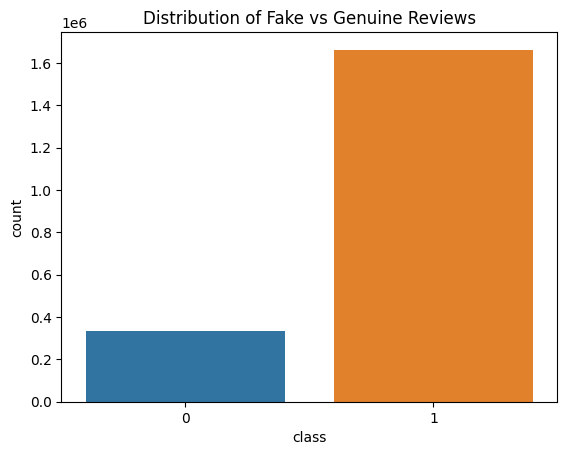

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = 'class', data = original_dataframe)
plt.title('Distribution of Fake vs Genuine Reviews')
plt.show()

**Thus, we see that te ratio of genuine : fake reviews is 1 : 5 (approx.)**

## Review Length Analysis

In [5]:
# Creating a new column 'review_length' an easier understanding of 'review_text'
original_dataframe['reviewLength'] = original_dataframe['reviewText'].apply(len)
original_dataframe.head()

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class,reviewLength
0,{'$oid': '5a13282b741a2384e879a620'},A3C9CSW3TJITGT,0005069491,Renee,"[0, 0]",I love these felt nursery rhyme characters and...,4,Charming characters but busy work required,1377561600,"08 27, 2013",Toys_and_Games,1,653
1,{'$oid': '5a13282b741a2384e879a621'},A31POTIYCKSZ9G,0076561046,So CA Teacher,"[0, 0]",I see no directions for its use. Therefore I h...,3,No directions for use...,1404864000,"07 9, 2014",Toys_and_Games,0,86
2,{'$oid': '5a13282b741a2384e879a622'},A2GGHHME9B6W4O,0131358936,Dalilah G.,"[0, 0]",This is a great tool for any teacher using the...,5,Great CD-ROM,1382400000,"10 22, 2013",Toys_and_Games,1,171
3,{'$oid': '5a13282b741a2384e879a61f'},AMEVO2LY6VEJA,0000191639,Nicole Soeder,"[0, 0]","Great product, thank you! Our son loved the pu...",5,Puzzles,1388016000,"12 26, 2013",Toys_and_Games,1,125
4,{'$oid': '5a13282b741a2384e879a623'},A1FSLDH43ORWZP,0133642984,Dayna English,"[0, 0]",Although not as streamlined as the Algebra I m...,5,Algebra II -- presentation materials,1374278400,"07 20, 2013",Toys_and_Games,1,160


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

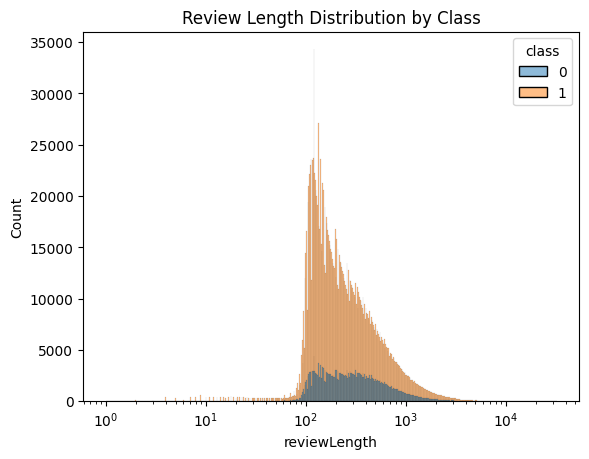

In [6]:
sns.histplot(data = original_dataframe, x = 'reviewLength', hue = 'class', multiple = 'layer', log_scale = True)
plt.title('Review Length Distribution by Class')
plt.show()


**Thus, review length analysis suggests that shorter length reviews are more likely classified as 0 (non-spam) while longer ones as 1 (spam). More precisely, the histplot shows that the reviews with length in the range of 1 to 100 are classified as 0 (non-spam) and the ones in range of 100 to 1000 are labelled as 1 (spam). Also, we notice a long tail at the right of the histplot for both classes. This suggests that both have only few long length reviews.**

**Summary: Class 1 i.e. spam, is more likely to be concentrated around long length reviews. While, class 0 is more likely to be concentrated around short length reviews.**

## Overall Rating Analysis

In [7]:
original_dataframe['overall'].value_counts()

overall
5    1275445
4     387309
3     129098
1     128156
2      77132
Name: count, dtype: int64

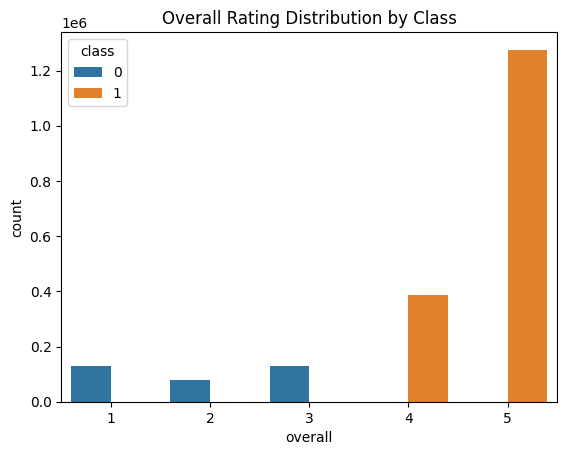

In [8]:
sns.countplot(data = original_dataframe, x = 'overall', hue = 'class')
plt.title('Overall Rating Distribution by Class')
plt.show()

**Thus, we can clearly see that lower rated reviews i.e. in the rating range of 1 to 3 are most likely to be non-spam. While, higher rated ones, precisely rated as 3 or 4 are most likely to be spam.**

## Helpful Votes Analysis

In [9]:
# making a new column which represents the ratio of helpful votes to total votes for a particular review.
original_dataframe['helpfulRatio'] = original_dataframe['helpful'].apply(lambda x: x[0] / x[1] if x[1] != 0 else 0)

In [10]:
original_dataframe.head()

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class,reviewLength,helpfulRatio
0,{'$oid': '5a13282b741a2384e879a620'},A3C9CSW3TJITGT,0005069491,Renee,"[0, 0]",I love these felt nursery rhyme characters and...,4,Charming characters but busy work required,1377561600,"08 27, 2013",Toys_and_Games,1,653,0.0
1,{'$oid': '5a13282b741a2384e879a621'},A31POTIYCKSZ9G,0076561046,So CA Teacher,"[0, 0]",I see no directions for its use. Therefore I h...,3,No directions for use...,1404864000,"07 9, 2014",Toys_and_Games,0,86,0.0
2,{'$oid': '5a13282b741a2384e879a622'},A2GGHHME9B6W4O,0131358936,Dalilah G.,"[0, 0]",This is a great tool for any teacher using the...,5,Great CD-ROM,1382400000,"10 22, 2013",Toys_and_Games,1,171,0.0
3,{'$oid': '5a13282b741a2384e879a61f'},AMEVO2LY6VEJA,0000191639,Nicole Soeder,"[0, 0]","Great product, thank you! Our son loved the pu...",5,Puzzles,1388016000,"12 26, 2013",Toys_and_Games,1,125,0.0
4,{'$oid': '5a13282b741a2384e879a623'},A1FSLDH43ORWZP,0133642984,Dayna English,"[0, 0]",Although not as streamlined as the Algebra I m...,5,Algebra II -- presentation materials,1374278400,"07 20, 2013",Toys_and_Games,1,160,0.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


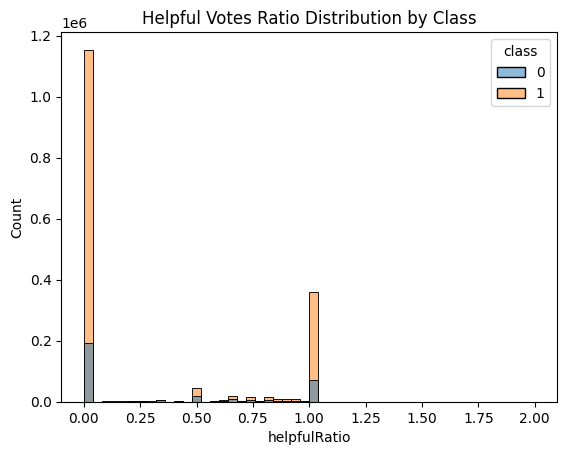

In [11]:
sns.histplot(data = original_dataframe, x = 'helpfulRatio', hue = 'class', multiple = 'layer', bins = 50)
plt.title('Helpful Votes Ratio Distribution by Class')
plt.show()

****Inferences from the graph:****
* ****Most instances of 'helpful_ratio' are 0.****
* ****The second most number of 'helpful_ratio' instances have a value of 1.****
* ****The number of non-spam reviews having 'helpful_ratio' = 0 is more than twice the number of non-spam reviews having****           ****the 'helpful_ratio' value as 1.****
* ****The number of spam reviews having 'helpful_ratio' = 0 is more than twice the number of spam reviews having the****              ****'helpful_ratio' value as 1.****

# Feature Engineering & Data Cleaning

## Dropping out unnecessary and redundant columns

In [12]:
columns_to_drop = ['_id', 'reviewerID', 'reviewerName', 'summary', 'reviewTime']
original_dataframe.drop(columns=columns_to_drop, inplace=True)

****Note - The 'reviewer_id' attribute is dropped for of now for the sake of simplicity. But it may be helpful to determine the behaviour of a reviewer in dropping reviews. That is, history of a reviewer will suggest a trend in the rating, review length and class given by the reviewer.****

In [13]:
original_dataframe.head()

,asin,helpful,reviewText,overall,unixReviewTime,category,class,reviewLength,helpfulRatio
0,0005069491,"[0, 0]",I love these felt nursery rhyme characters and...,4,1377561600,Toys_and_Games,1,653,0.0
1,0076561046,"[0, 0]",I see no directions for its use. Therefore I h...,3,1404864000,Toys_and_Games,0,86,0.0
2,0131358936,"[0, 0]",This is a great tool for any teacher using the...,5,1382400000,Toys_and_Games,1,171,0.0
3,0000191639,"[0, 0]","Great product, thank you! Our son loved the pu...",5,1388016000,Toys_and_Games,1,125,0.0
4,0133642984,"[0, 0]",Although not as streamlined as the Algebra I m...,5,1374278400,Toys_and_Games,1,160,0.0


In [14]:
original_dataframe.tail()

,asin,helpful,reviewText,overall,unixReviewTime,category,class,reviewLength,helpfulRatio
1997135,B00LRXEK4G,"[2, 4]",Donny looks awesome in his wizard outfit. It r...,4,1405209600,Toys_and_Games,1,606,0.500000
1997136,B00LOYLHOE,"[2, 3]","When I was a kid, I always heard, and sometime...",5,1405123200,Toys_and_Games,1,1242,0.666667
1997137,B00LXACM5W,"[0, 0]",The kids had hours and hours of fun with this....,5,1405900800,Toys_and_Games,1,143,0.000000
1997138,B00LXACM5W,"[0, 0]",this pack of water shooters and splash balls a...,5,1405814400,Toys_and_Games,1,264,0.000000
1997139,B00M0TTT5Q,"[0, 0]",Awesome!!! These lights are SO BRIGHT!! Way be...,5,1405987200,Toys_and_Games,1,294,0.000000


In [15]:
original_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997140 entries, 0 to 1997139
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   asin            object 
 1   helpful         object 
 2   reviewText      object 
 3   overall         int64  
 4   unixReviewTime  int64  
 5   category        object 
 6   class           int64  
 7   reviewLength    int64  
 8   helpfulRatio    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 137.1+ MB


## Creating new Features on the basis of EDA

In [16]:
# review word count
original_dataframe['wordCount'] = original_dataframe['reviewText'].apply(lambda x: len(x.split()))

# avrage word length
original_dataframe['avgWordLength'] = original_dataframe['reviewText'].apply(lambda x: sum(len(word) for word in x.split()) / len(x.split()))

In [17]:
original_dataframe.head()

,asin,helpful,reviewText,overall,unixReviewTime,category,class,reviewLength,helpfulRatio,wordCount,avgWordLength
0,0005069491,"[0, 0]",I love these felt nursery rhyme characters and...,4,1377561600,Toys_and_Games,1,653,0.0,117,4.538462
1,0076561046,"[0, 0]",I see no directions for its use. Therefore I h...,3,1404864000,Toys_and_Games,0,86,0.0,16,4.437500
2,0131358936,"[0, 0]",This is a great tool for any teacher using the...,5,1382400000,Toys_and_Games,1,171,0.0,30,4.733333
3,0000191639,"[0, 0]","Great product, thank you! Our son loved the pu...",5,1388016000,Toys_and_Games,1,125,0.0,23,4.434783
4,0133642984,"[0, 0]",Although not as streamlined as the Algebra I m...,5,1374278400,Toys_and_Games,1,160,0.0,25,5.440000


## Sentiment Analysis

**Here, I am using VADER(Valence Aware Dictionary and sEntiment Reasoner). This is because it is specifically tuned to sentiments expressed in social media text.**

**Brief discription, After analysis it provides with four values:**

1. **'neg' - ranging from 0-1. Gives measure of sentiment being negative.**
2. **'neu' - ranging from 0-1. Gives measure of sentiment being neutral.**
3. **'pos' - ranging from 0-1. Gives measure of sentiment being positive.**
4. **'compound' - ranging from 0-1. Cumulative variable. Combines above three. >=0.5 means positive, <=-0.5 means negative, ranging between means neutral text.**

In [18]:
!pip install vaderSentiment

Looking in links: /kaggle/input/pm-67260820-at-12-18-2024-19-31-06/


In [19]:
# Slicing out a part of dataframe for building purpose. 
# Precisely now we will continue with first 1 lac instances.
# here .copy() function is used show that we get a deep copy of the sliced dataframe for various operations.

# original_dataframe_part = original_dataframe.iloc[:200 , : ].copy()
original_dataframe_part = original_dataframe.sample(n=160000, random_state=42).copy()

In [20]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA

analyzer = SIA()

def analyze_sentiment_vader(review):
    sentiment = analyzer.polarity_scores(review)
    return sentiment['compound']

original_dataframe_part['sentiment'] = original_dataframe_part['reviewText'].apply(analyze_sentiment_vader)

In [21]:
original_dataframe_part

,asin,helpful,reviewText,overall,unixReviewTime,category,class,reviewLength,helpfulRatio,wordCount,avgWordLength,sentiment
845681,B002BIRM2S,"[2, 2]",I really can't believe that others have rated ...,2,1388361600,Toys_and_Games,0,1010,1.0,204,3.955882,0.4320
1107550,B003YZ97TS,"[0, 0]",3 Yr old who breaks everything he comes into c...,5,1357516800,Toys_and_Games,1,306,0.0,56,4.410714,0.9774
672632,B0019IF0BG,"[0, 0]",got these cups for my sons 4th birthday party ...,4,1360540800,Toys_and_Games,1,222,0.0,42,4.309524,0.9399
1422772,B005V4IIRW,"[0, 0]",It's REALLY small. The picture makes it look b...,3,1386633600,Toys_and_Games,0,120,0.0,23,4.260870,0.8819
763641,B001Q0VECQ,"[0, 0]",This little dragon was absolutely perfect for ...,5,1385942400,Toys_and_Games,1,184,0.0,31,4.903226,0.8122
...,...,...,...,...,...,...,...,...,...,...,...,...
1281018,B004S9GUE4,"[1, 1]",Well thought game. Beautiful pictures. Age ran...,5,1389052800,Toys_and_Games,1,138,1.0,24,4.791667,0.9229
1888772,B00DHFOQHI,"[1, 2]",I bought this for one my nephew. I had never ...,4,1390694400,Toys_and_Games,1,151,0.5,28,4.357143,0.8302
410014,B000HV0EJ4,"[0, 0]","The idea is cute, to make a personilized umbre...",5,1324080000,Toys_and_Games,1,169,0.0,28,5.071429,0.8718
259121,B0007WX04O,"[0, 0]",For children it is very interesting toy to pla...,5,1225411200,Toys_and_Games,1,141,0.0,28,4.071429,0.8977


## Extracting Time based features

In [22]:
original_dataframe_part['review_year'] = pd.to_datetime(original_dataframe_part['unixReviewTime'], unit='s').dt.year
original_dataframe_part['review_month'] = pd.to_datetime(original_dataframe_part['unixReviewTime'], unit='s').dt.month
original_dataframe_part['review_day'] = pd.to_datetime(original_dataframe_part['unixReviewTime'], unit='s').dt.day
original_dataframe_part['review_day_of_week'] = pd.to_datetime(original_dataframe_part['unixReviewTime'], unit='s').dt.dayofweek

In [23]:
original_dataframe_part

,asin,helpful,reviewText,overall,unixReviewTime,category,class,reviewLength,helpfulRatio,wordCount,avgWordLength,sentiment,review_year,review_month,review_day,review_day_of_week
845681,B002BIRM2S,"[2, 2]",I really can't believe that others have rated ...,2,1388361600,Toys_and_Games,0,1010,1.0,204,3.955882,0.4320,2013,12,30,0
1107550,B003YZ97TS,"[0, 0]",3 Yr old who breaks everything he comes into c...,5,1357516800,Toys_and_Games,1,306,0.0,56,4.410714,0.9774,2013,1,7,0
672632,B0019IF0BG,"[0, 0]",got these cups for my sons 4th birthday party ...,4,1360540800,Toys_and_Games,1,222,0.0,42,4.309524,0.9399,2013,2,11,0
1422772,B005V4IIRW,"[0, 0]",It's REALLY small. The picture makes it look b...,3,1386633600,Toys_and_Games,0,120,0.0,23,4.260870,0.8819,2013,12,10,1
763641,B001Q0VECQ,"[0, 0]",This little dragon was absolutely perfect for ...,5,1385942400,Toys_and_Games,1,184,0.0,31,4.903226,0.8122,2013,12,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281018,B004S9GUE4,"[1, 1]",Well thought game. Beautiful pictures. Age ran...,5,1389052800,Toys_and_Games,1,138,1.0,24,4.791667,0.9229,2014,1,7,1
1888772,B00DHFOQHI,"[1, 2]",I bought this for one my nephew. I had never ...,4,1390694400,Toys_and_Games,1,151,0.5,28,4.357143,0.8302,2014,1,26,6
410014,B000HV0EJ4,"[0, 0]","The idea is cute, to make a personilized umbre...",5,1324080000,Toys_and_Games,1,169,0.0,28,5.071429,0.8718,2011,12,17,5
259121,B0007WX04O,"[0, 0]",For children it is very interesting toy to pla...,5,1225411200,Toys_and_Games,1,141,0.0,28,4.071429,0.8977,2008,10,31,4


## Scaling Pipeline fitting data

In [24]:
scaling_pipeline_fitting_data = original_dataframe_part[['reviewLength', 'helpfulRatio', 'wordCount', 'avgWordLength']].copy()
scaling_pipeline_fitting_data.head()

,reviewLength,helpfulRatio,wordCount,avgWordLength
845681,1010,1.0,204,3.955882
1107550,306,0.0,56,4.410714
672632,222,0.0,42,4.309524
1422772,120,0.0,23,4.260870
763641,184,0.0,31,4.903226


# Text Preprocessing

**Text Preprocessing Steps:**

Lowercasing: Convert all text to lowercase to ensure uniformity.

Remove Punctuation: Remove punctuation marks from the text.

Remove Numbers: Remove numbers unless they carry significant meaning.

Remove Whitespace: Remove extra spaces, tabs, and newlines.

Tokenization: Split the text into individual words or tokens.

Remove Stop Words: Remove common words that do not carry significant meaning (e.g., 'and', 'the', 'is').

Stemming/Lemmatization: Reduce words to their base or root form.

Handling Contractions: Expand contractions (e.g., "can't" to "cannot").

Remove Special Characters: Remove special characters and symbols.

Spell Correction: Correct spelling errors (optional, based on use case).

## Lowercasing

In [25]:
original_dataframe_part['reviewText_lower'] = original_dataframe_part['reviewText'].str.lower()
original_dataframe_part[['reviewText', 'reviewText_lower']].head()

,reviewText,reviewText_lower
845681,I really can't believe that others have rated ...,i really can't believe that others have rated ...
1107550,3 Yr old who breaks everything he comes into c...,3 yr old who breaks everything he comes into c...
672632,got these cups for my sons 4th birthday party ...,got these cups for my sons 4th birthday party ...
1422772,It's REALLY small. The picture makes it look b...,it's really small. the picture makes it look b...
763641,This little dragon was absolutely perfect for ...,this little dragon was absolutely perfect for ...


## Expanding Contractions

**Contractions stand for the common english words which represent a group of words for eg. 'can't' in place of 'cannot'.**

In [26]:
# Importing regular expression library
import re

contractions = {
    "can't": "cannot",
    "won't": "will not",
    "n't": " not",
    "'re": " are",
    "'s": " is",
    "'d": " would",
    "'ll": " will",
    "'t": " not",
    "'ve": " have",
    "'m": " am"
}

# Function to expand contractions
def expand_contractions(text, contractions_dict=contractions):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())), 
                                      flags=re.IGNORECASE | re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        expanded_contraction = contractions_dict.get(match.lower())
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

# Apply to dataframe
original_dataframe_part['reviewText_expanded'] = original_dataframe_part['reviewText_lower'].apply(expand_contractions)
original_dataframe_part[['reviewText_lower', 'reviewText_expanded']].head()


,reviewText_lower,reviewText_expanded
845681,i really can't believe that others have rated ...,i really cannot believe that others have rated...
1107550,3 yr old who breaks everything he comes into c...,3 yr old who breaks everything he comes into c...
672632,got these cups for my sons 4th birthday party ...,got these cups for my sons 4th birthday party ...
1422772,it's really small. the picture makes it look b...,it is really small. the picture makes it look ...
763641,this little dragon was absolutely perfect for ...,this little dragon was absolutely perfect for ...


## Removing Punctuations

In [27]:
import string

# Remove punctuation
original_dataframe_part['reviewText_no_punct'] = original_dataframe_part['reviewText_expanded'].str.translate(str.maketrans('', '', string.punctuation))
original_dataframe_part[['reviewText_expanded', 'reviewText_no_punct']].head()

,reviewText_expanded,reviewText_no_punct
845681,i really cannot believe that others have rated...,i really cannot believe that others have rated...
1107550,3 yr old who breaks everything he comes into c...,3 yr old who breaks everything he comes into c...
672632,got these cups for my sons 4th birthday party ...,got these cups for my sons 4th birthday party ...
1422772,it is really small. the picture makes it look ...,it is really small the picture makes it look b...
763641,this little dragon was absolutely perfect for ...,this little dragon was absolutely perfect for ...


## Removing Numbers (if any)

In [28]:
# Remove numbers
original_dataframe_part['reviewText_no_numbers'] = original_dataframe_part['reviewText_no_punct'].str.replace(r'\d+', '', regex=True)
original_dataframe_part[['reviewText_no_punct', 'reviewText_no_numbers']].head()

,reviewText_no_punct,reviewText_no_numbers
845681,i really cannot believe that others have rated...,i really cannot believe that others have rated...
1107550,3 yr old who breaks everything he comes into c...,yr old who breaks everything he comes into co...
672632,got these cups for my sons 4th birthday party ...,got these cups for my sons th birthday party ...
1422772,it is really small the picture makes it look b...,it is really small the picture makes it look b...
763641,this little dragon was absolutely perfect for ...,this little dragon was absolutely perfect for ...


## Removing Whitespaces

**Removing leading, trailing whitespaces and newlines or tabs.**

In [29]:
# Remove whitespace
original_dataframe_part['reviewText_clean'] = original_dataframe_part['reviewText_no_numbers'].str.strip()
original_dataframe_part['reviewText_clean'] = original_dataframe_part['reviewText_clean'].str.replace(r'\s+', ' ', regex=True)
original_dataframe_part[['reviewText_no_numbers', 'reviewText_clean']].head()

,reviewText_no_numbers,reviewText_clean
845681,i really cannot believe that others have rated...,i really cannot believe that others have rated...
1107550,yr old who breaks everything he comes into co...,yr old who breaks everything he comes into con...
672632,got these cups for my sons th birthday party ...,got these cups for my sons th birthday party p...
1422772,it is really small the picture makes it look b...,it is really small the picture makes it look b...
763641,this little dragon was absolutely perfect for ...,this little dragon was absolutely perfect for ...


## Tokenization

In [30]:
import nltk

from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Tokenize
original_dataframe_part['reviewText_tokens'] = original_dataframe_part['reviewText_clean'].apply(word_tokenize)
original_dataframe_part[['reviewText_clean', 'reviewText_tokens']].head()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reviewText_clean,reviewText_tokens
845681,i really cannot believe that others have rated...,"[i, really, can, not, believe, that, others, h..."
1107550,yr old who breaks everything he comes into con...,"[yr, old, who, breaks, everything, he, comes, ..."
672632,got these cups for my sons th birthday party p...,"[got, these, cups, for, my, sons, th, birthday..."
1422772,it is really small the picture makes it look b...,"[it, is, really, small, the, picture, makes, i..."
763641,this little dragon was absolutely perfect for ...,"[this, little, dragon, was, absolutely, perfec..."


## Removing Stop Words

**Stop words are the most commonly and often used words in english which as such do not have any significant impact on the model for text analysis. Example, 'I', 'in', ... etc.**

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Remove stop words
stop_words = set(stopwords.words('english'))
original_dataframe_part['reviewText_no_stopwords'] = original_dataframe_part['reviewText_tokens'].apply(lambda x: [word for word in x if word not in stop_words])
original_dataframe_part[['reviewText_tokens', 'reviewText_no_stopwords']].head()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewText_tokens,reviewText_no_stopwords
845681,"[i, really, can, not, believe, that, others, h...","[really, believe, others, rated, item, high, w..."
1107550,"[yr, old, who, breaks, everything, he, comes, ...","[yr, old, breaks, everything, comes, contact, ..."
672632,"[got, these, cups, for, my, sons, th, birthday...","[got, cups, sons, th, birthday, party, pirate,..."
1422772,"[it, is, really, small, the, picture, makes, i...","[really, small, picture, makes, look, bigger, ..."
763641,"[this, little, dragon, was, absolutely, perfec...","[little, dragon, absolutely, perfect, khaleesi..."


## Combining into a single string

In [32]:
# Join words back into a single string
original_dataframe_part['combined_reviewText'] = original_dataframe_part['reviewText_no_stopwords'].apply(lambda x: ' '.join(x))
original_dataframe_part[['reviewText_no_stopwords', 'combined_reviewText']].head()

,reviewText_no_stopwords,combined_reviewText
845681,"[really, believe, others, rated, item, high, w...",really believe others rated item high wife got...
1107550,"[yr, old, breaks, everything, comes, contact, ...",yr old breaks everything comes contact unable ...
672632,"[got, cups, sons, th, birthday, party, pirate,...",got cups sons th birthday party pirate themedc...
1422772,"[really, small, picture, makes, look, bigger, ...",really small picture makes look bigger daughte...
763641,"[little, dragon, absolutely, perfect, khaleesi...",little dragon absolutely perfect khaleesi hall...


## Stemming/Lemmatization

**Stemming and lemmatization are text preprocessing techniques in natural language processing (NLP) that reduce the inflected forms of words to a common root word. Example, 'running', 'runnable' all are modified into the root word i.e. 'run'.**

In [33]:
import spacy

# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Function to preprocess and lemmatize text
def preprocess_and_lemmatize(text):
    # Process the text with spaCy
    doc = nlp(text)
    
    # Lemmatize and remove stop words and punctuation
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    
    return ' '.join(tokens)

# Apply preprocessing and lemmatization
original_dataframe_part['cleaned_reviewText'] = original_dataframe_part['combined_reviewText'].apply(preprocess_and_lemmatize)

# Show the first few rows
original_dataframe_part[['combined_reviewText', 'cleaned_reviewText']].head()


,combined_reviewText,cleaned_reviewText
845681,really believe others rated item high wife got...,believe rate item high wife get christmas ok p...
1107550,yr old breaks everything comes contact unable ...,yr old break come contact unable destroy spide...
672632,got cups sons th birthday party pirate themedc...,get cup son th birthday party pirate themedcou...
1422772,really small picture makes look bigger daughte...,small picture make look big daughter love cute...
763641,little dragon absolutely perfect khaleesi hall...,little dragon absolutely perfect khaleesi hall...


## Dropping out unnecessary columns 1

In [34]:
columns_to_drop = ['reviewText_lower', 'reviewText_expanded', 'reviewText_no_punct', 'reviewText_no_numbers', 'reviewText_clean', 'reviewText_tokens', 'reviewText_no_stopwords', 'combined_reviewText']
original_dataframe_part.drop(columns=columns_to_drop, inplace=True)

# Exploratory Data Analysis (EDA) Part II

## Visualizing Word Frequencies

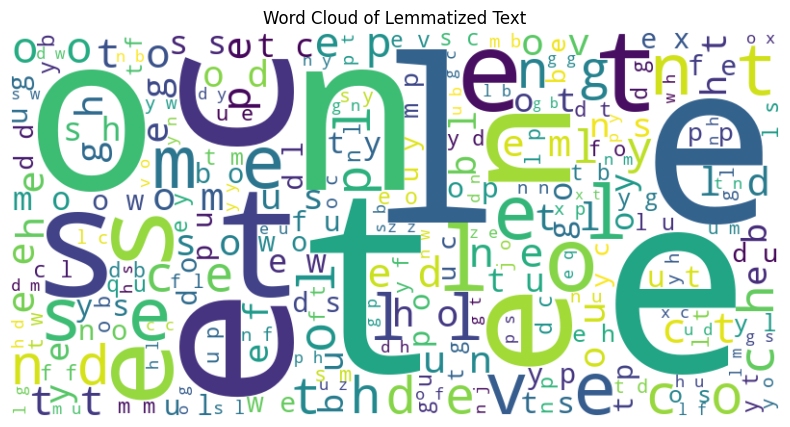

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a single string of all lemmatized reviews
all_lemmatized_text = ' '.join(original_dataframe_part['cleaned_reviewText'].apply(lambda x: ' '.join(x)))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_lemmatized_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Lemmatized Text')
plt.show()


## Plotting Review Length Distribution

In [36]:
original_dataframe_part.head()

,asin,helpful,reviewText,overall,unixReviewTime,category,class,reviewLength,helpfulRatio,wordCount,avgWordLength,sentiment,review_year,review_month,review_day,review_day_of_week,cleaned_reviewText
845681,B002BIRM2S,"[2, 2]",I really can't believe that others have rated ...,2,1388361600,Toys_and_Games,0,1010,1.0,204,3.955882,0.4320,2013,12,30,0,believe rate item high wife get christmas ok p...
1107550,B003YZ97TS,"[0, 0]",3 Yr old who breaks everything he comes into c...,5,1357516800,Toys_and_Games,1,306,0.0,56,4.410714,0.9774,2013,1,7,0,yr old break come contact unable destroy spide...
672632,B0019IF0BG,"[0, 0]",got these cups for my sons 4th birthday party ...,4,1360540800,Toys_and_Games,1,222,0.0,42,4.309524,0.9399,2013,2,11,0,get cup son th birthday party pirate themedcou...
1422772,B005V4IIRW,"[0, 0]",It's REALLY small. The picture makes it look b...,3,1386633600,Toys_and_Games,0,120,0.0,23,4.260870,0.8819,2013,12,10,1,small picture make look big daughter love cute...
763641,B001Q0VECQ,"[0, 0]",This little dragon was absolutely perfect for ...,5,1385942400,Toys_and_Games,1,184,0.0,31,4.903226,0.8122,2013,12,2,0,little dragon absolutely perfect khaleesi hall...


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


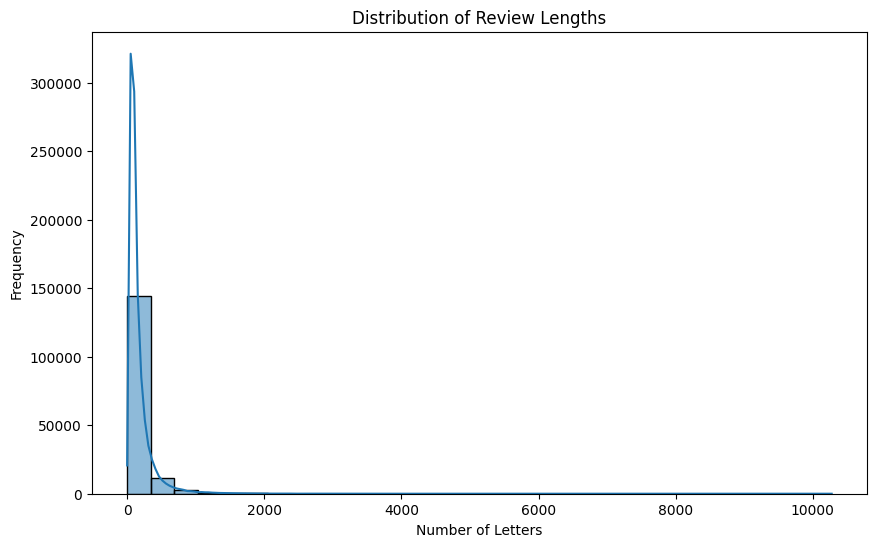

In [37]:
# Calculate the length of each review
original_dataframe_part['review_length'] = original_dataframe_part['cleaned_reviewText'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(original_dataframe_part['review_length'], bins=30, kde=True )
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Letters')
plt.ylabel('Frequency')
plt.show()


**From this we see that the reviews of small length are more in number while reviews of large length are few**

# Feature Engineering Part-II

## Sentiment Labeling

In [38]:
# Labeling reviews based on compound sentiment score
def sentiment_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment labeling
original_dataframe_part['sentimentLabel'] = original_dataframe_part['sentiment'].apply(sentiment_label)
original_dataframe_part[['sentiment', 'sentimentLabel']].head()

,sentiment,sentimentLabel
845681,0.4320,positive
1107550,0.9774,positive
672632,0.9399,positive
1422772,0.8819,positive
763641,0.8122,positive


**This is a categorical variable and will be converted into numerical classes later for ML model to understand it easily**

## Text Vectorization

**Checking for NAN values.**

In [39]:
print(original_dataframe_part['cleaned_reviewText'].isna().sum())
print(original_dataframe_part['cleaned_reviewText'].apply(lambda x: len(x) == 0).sum())

0
10


**Removing the found value.**

In [40]:
original_dataframe_part = original_dataframe_part[original_dataframe_part['cleaned_reviewText'].apply(lambda x: len(x) > 0)]
original_dataframe_part = original_dataframe_part.dropna(subset=['cleaned_reviewText'])

In [41]:
print(original_dataframe_part['cleaned_reviewText'].isna().sum())
print(original_dataframe_part['cleaned_reviewText'].apply(lambda x: len(x) == 0).sum())

0
0


**Verifing Text Lengths.**

In [42]:
original_dataframe_part['text_length'] = original_dataframe_part['cleaned_reviewText'].apply(len)
print(original_dataframe_part['text_length'].describe())

count    159990.000000
mean        169.738509
std         215.295039
min           2.000000
25%          69.000000
50%         105.000000
75%         189.000000
max       10275.000000
Name: text_length, dtype: float64


**Applying TF-IDF Vectorization.**

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000, max_df=0.8)

# Fit and transform the text data
X = tfidf_vectorizer.fit_transform(original_dataframe_part['cleaned_reviewText'])

# View the shape of the transformed data
print(X.shape)

(159990, 2000)


**Note that 'X' is a sparse matrix and should be converted into a dense matrix for viewing.**

In [44]:
# Convert the entire sparse matrix to a dense matrix (use with caution)
dense_matrix = X.toarray()

# Create a DataFrame
df_dense = pd.DataFrame(dense_matrix)

# Display the DataFrame
df_dense


,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.174751,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.228412,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159985,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
159986,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
159987,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
159988,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Vectorization fitting pipelining data

In [45]:
vectorization_pipeline_fitting_data = original_dataframe_part['cleaned_reviewText'].copy()

vectorization_pipeline_fitting_data.head()

845681     believe rate item high wife get christmas ok p...
1107550    yr old break come contact unable destroy spide...
672632     get cup son th birthday party pirate themedcou...
1422772    small picture make look big daughter love cute...
763641     little dragon absolutely perfect khaleesi hall...
Name: cleaned_reviewText, dtype: object

# Feature Selection

## Taking only required features into consideration

In [46]:
original_dataframe_part.head()

,asin,helpful,reviewText,overall,unixReviewTime,category,class,reviewLength,helpfulRatio,wordCount,avgWordLength,sentiment,review_year,review_month,review_day,review_day_of_week,cleaned_reviewText,review_length,sentimentLabel,text_length
845681,B002BIRM2S,"[2, 2]",I really can't believe that others have rated ...,2,1388361600,Toys_and_Games,0,1010,1.0,204,3.955882,0.4320,2013,12,30,0,believe rate item high wife get christmas ok p...,424,positive,424
1107550,B003YZ97TS,"[0, 0]",3 Yr old who breaks everything he comes into c...,5,1357516800,Toys_and_Games,1,306,0.0,56,4.410714,0.9774,2013,1,7,0,yr old break come contact unable destroy spide...,172,positive,172
672632,B0019IF0BG,"[0, 0]",got these cups for my sons 4th birthday party ...,4,1360540800,Toys_and_Games,1,222,0.0,42,4.309524,0.9399,2013,2,11,0,get cup son th birthday party pirate themedcou...,129,positive,129
1422772,B005V4IIRW,"[0, 0]",It's REALLY small. The picture makes it look b...,3,1386633600,Toys_and_Games,0,120,0.0,23,4.260870,0.8819,2013,12,10,1,small picture make look big daughter love cute...,56,positive,56
763641,B001Q0VECQ,"[0, 0]",This little dragon was absolutely perfect for ...,5,1385942400,Toys_and_Games,1,184,0.0,31,4.903226,0.8122,2013,12,2,0,little dragon absolutely perfect khaleesi hall...,122,positive,122


In [47]:
columns_to_drop = ['asin', 'helpful', 'reviewText', 'unixReviewTime', 'category', 'sentiment', 'review_length', 'text_length']
original_dataframe_part.drop(columns=columns_to_drop, inplace=True)

In [48]:
original_dataframe_part.head()

,overall,class,reviewLength,helpfulRatio,wordCount,avgWordLength,review_year,review_month,review_day,review_day_of_week,cleaned_reviewText,sentimentLabel
845681,2,0,1010,1.0,204,3.955882,2013,12,30,0,believe rate item high wife get christmas ok p...,positive
1107550,5,1,306,0.0,56,4.410714,2013,1,7,0,yr old break come contact unable destroy spide...,positive
672632,4,1,222,0.0,42,4.309524,2013,2,11,0,get cup son th birthday party pirate themedcou...,positive
1422772,3,0,120,0.0,23,4.260870,2013,12,10,1,small picture make look big daughter love cute...,positive
763641,5,1,184,0.0,31,4.903226,2013,12,2,0,little dragon absolutely perfect khaleesi hall...,positive


## Encoding categorical variables

In [49]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'sentimentLabel' column
original_dataframe_part['encoded_sentimentLabel'] = label_encoder.fit_transform(original_dataframe_part['sentimentLabel'])

columns_to_drop = ['sentimentLabel']
original_dataframe_part.drop(columns=columns_to_drop, inplace=True)

In [50]:
original_dataframe_part.head()

,overall,class,reviewLength,helpfulRatio,wordCount,avgWordLength,review_year,review_month,review_day,review_day_of_week,cleaned_reviewText,encoded_sentimentLabel
845681,2,0,1010,1.0,204,3.955882,2013,12,30,0,believe rate item high wife get christmas ok p...,2
1107550,5,1,306,0.0,56,4.410714,2013,1,7,0,yr old break come contact unable destroy spide...,2
672632,4,1,222,0.0,42,4.309524,2013,2,11,0,get cup son th birthday party pirate themedcou...,2
1422772,3,0,120,0.0,23,4.260870,2013,12,10,1,small picture make look big daughter love cute...,2
763641,5,1,184,0.0,31,4.903226,2013,12,2,0,little dragon absolutely perfect khaleesi hall...,2


In [51]:
# dropping out unnecessary columns.
columns_to_drop = ['cleaned_reviewText', 'review_day']
original_dataframe_part.drop(columns=columns_to_drop, inplace=True)
original_dataframe_part.head()

,overall,class,reviewLength,helpfulRatio,wordCount,avgWordLength,review_year,review_month,review_day_of_week,encoded_sentimentLabel
845681,2,0,1010,1.0,204,3.955882,2013,12,0,2
1107550,5,1,306,0.0,56,4.410714,2013,1,0,2
672632,4,1,222,0.0,42,4.309524,2013,2,0,2
1422772,3,0,120,0.0,23,4.260870,2013,12,1,2
763641,5,1,184,0.0,31,4.903226,2013,12,0,2


# Feature Engineering Part-III

## Scaling Numerical features

In [52]:
# Columns to be scaled (numerical features)
numerical_features = ['reviewLength', 'helpfulRatio', 'wordCount', 'avgWordLength']

# Columns, not to be scaled (categorical ones)
categorical_features = ['overall', 'class', 'review_year', 'review_month', 'encoded_sentimentLabel', 'review_day_of_week']

# Separating numerical features and categorical features
odp_num = original_dataframe_part[numerical_features]
odp_cat = original_dataframe_part[categorical_features]

In [53]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

temp = scaler.fit_transform(odp_num)

# temp is numpy array first it should be converted to DataFrame
odp_num_scaled = pd.DataFrame(temp, columns = odp_num.columns)

## Combining scaled numerical features with categorical features

In [54]:
original_dataframe_part_scaled = pd.concat([odp_num_scaled.reset_index(drop=True), odp_cat.reset_index(drop=True)], axis=1)
original_dataframe_part_scaled.head()

,reviewLength,helpfulRatio,wordCount,avgWordLength,overall,class,review_year,review_month,encoded_sentimentLabel,review_day_of_week
0,1.586360,1.672334,1.817972,-0.693623,2,0,2013,12,2,0
1,-0.091434,-0.667386,-0.115657,0.250952,5,1,2013,1,2,0
2,-0.291625,-0.667386,-0.298567,0.040804,4,1,2013,2,2,0
3,-0.534715,-0.667386,-0.546804,-0.060239,3,0,2013,12,2,1
4,-0.382188,-0.667386,-0.442283,1.273779,5,1,2013,12,2,0


## Combining vectorized text into dataframe

In [55]:
df_combined = pd.concat([original_dataframe_part_scaled.reset_index(drop=True), df_dense.reset_index(drop=True)], axis=1)

# Convert all column names to String
df_combined.columns = df_combined.columns.astype(str)

# df_combined = original_dataframe_part_scaled
# Display the new DataFrame
df_combined.head()

,reviewLength,helpfulRatio,wordCount,avgWordLength,overall,class,review_year,review_month,encoded_sentimentLabel,review_day_of_week,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,1.586360,1.672334,1.817972,-0.693623,2,0,2013,12,2,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,-0.091434,-0.667386,-0.115657,0.250952,5,1,2013,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.174751,0.0,0.0,0.0,0.0
2,-0.291625,-0.667386,-0.298567,0.040804,4,1,2013,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,-0.534715,-0.667386,-0.546804,-0.060239,3,0,2013,12,2,1,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,-0.382188,-0.667386,-0.442283,1.273779,5,1,2013,12,2,0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Dropping out unnecessary columns 2

In [56]:
columns_to_drop = ['review_year', 'review_month', 'review_day_of_week']
df_combined.drop(columns=columns_to_drop, inplace=True)
df_combined.head()

,reviewLength,helpfulRatio,wordCount,avgWordLength,overall,class,encoded_sentimentLabel,0,1,2,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,1.586360,1.672334,1.817972,-0.693623,2,0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,-0.091434,-0.667386,-0.115657,0.250952,5,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.174751,0.0,0.0,0.0,0.0
2,-0.291625,-0.667386,-0.298567,0.040804,4,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,-0.534715,-0.667386,-0.546804,-0.060239,3,0,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,-0.382188,-0.667386,-0.442283,1.273779,5,1,2,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Splitting Training and Testing data

**As we are having some categorical atrributes so there arises need for a stratified shuffle split. Thus we will use the scikit-learn's StratifiedShuffleSplit function for splitting our training and testing data.**

**Stratified shuffle split works only taking one column into consideration. So we will combine various categorical attributes into one and then after splitting, drop it.**

## Applying Stratified Shuffle Split

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit

# Example categorical columns to stratify by
df_combined['stratify_col'] = df_combined[['overall', 'class', 'encoded_sentimentLabel']].astype(str).agg('_'.join, axis=1)

# Initialize the split object
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split using the combined column
for strat_train_index, strat_test_index in split.split(df_combined, df_combined['stratify_col']):
    strat_train_set = df_combined.loc[strat_train_index].drop(columns=['stratify_col']).reset_index(drop=True)
    strat_test_set = df_combined.loc[strat_test_index].drop(columns=['stratify_col']).reset_index(drop=True)

# Optional: Verify the distribution
print(strat_train_set['overall'].value_counts())
print(strat_test_set['overall'].value_counts())

print(strat_train_set['class'].value_counts())
print(strat_test_set['class'].value_counts())

print(strat_train_set['encoded_sentimentLabel'].value_counts())
print(strat_test_set['encoded_sentimentLabel'].value_counts())

overall
5    81855
4    24595
3     8362
1     8248
2     4932
Name: count, dtype: int64
overall
5    20464
4     6149
3     2090
1     2062
2     1233
Name: count, dtype: int64
class
1    106450
0     21542
Name: count, dtype: int64
class
1    26613
0     5385
Name: count, dtype: int64
encoded_sentimentLabel
2    113654
0     11360
1      2978
Name: count, dtype: int64
encoded_sentimentLabel
2    28414
0     2839
1      745
Name: count, dtype: int64


## Taking out a validation set

In [58]:
# strat_train_set['stratify_col'] = strat_train_set[['overall', 'class', 'encoded_sentimentLabel']].astype(str).agg('_'.join, axis=1)

# # Initialize the split object for the train-validation split
# split = StratifiedShuffleSplit(n_splits=1, test_size=0.05, random_state=42)

# # Perform the train-validation split
# for train_index, strat_val_index in split.split(strat_train_set, strat_train_set['stratify_col']):
#     train_set = strat_train_set.loc[train_index].drop(columns=['stratify_col']).reset_index(drop=True)
#     strat_val_set = strat_train_set.loc[strat_val_index].drop(columns=['stratify_col']).reset_index(drop=True)

# # dropping out 'stratify_col' from strat_train_set
# strat_train_set = strat_train_set.drop(columns=['stratify_col'])

# # Optional: Verify the distribution
# print(train_set['overall'].value_counts())
# print(strat_val_set['overall'].value_counts())

# print(train_set['class'].value_counts())
# print(strat_val_set['class'].value_counts())

# print(train_set['encoded_sentimentLabel'].value_counts())
# print(strat_val_set['encoded_sentimentLabel'].value_counts())

**Now what we have is:**
* ****strat_train_set****
<!-- * **strat_val_set** -->
* **strat_test_set**

# Separating Feature(s) and Label(s)

In [59]:
#The label column is the second column in both DataFrames i.e. named as 'class'
label_column = strat_train_set.columns[5]

# Separating features and labels for the training set
X_train = strat_train_set.drop(columns=[label_column])
y_train = strat_train_set[label_column]

# Separating features and labels for the validation set
# X_val = strat_val_set.drop(columns=[label_column])
# y_val = strat_val_set[label_column]

# Separating features and labels for the test set
X_test = strat_test_set.drop(columns=[label_column])
y_test = strat_test_set[label_column]

# Display the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\n" + "-"*60 + "\n")
# print("X_val shape:", X_val.shape)
# print("y_val shape:", y_val.shape)
# print("\n" + "-"*60 + "\n")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (127992, 2006)
y_train shape: (127992,)

------------------------------------------------------------

X_test shape: (31998, 2006)
y_test shape: (31998,)


In [60]:
X_train

,reviewLength,helpfulRatio,wordCount,avgWordLength,overall,encoded_sentimentLabel,0,1,2,3,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,-0.170081,-0.667386,-0.115657,-0.824511,4,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,-0.437002,-0.667386,-0.376958,-1.755756,5,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.257572,0.0,0.0,0.0,0.0
2,-0.139099,1.672334,-0.076461,-1.024393,5,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.742696,1.672334,0.563726,1.647819,5,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.206470,-0.667386,0.263230,-0.553137,5,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127987,-0.546631,-0.667386,-0.585999,0.851728,5,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
127988,-0.489433,-0.667386,-0.481478,-0.676172,3,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
127989,-0.472751,-0.667386,-0.468413,-0.458777,5,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
127990,1.333737,1.468880,1.465215,-0.426005,5,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


# Trying out different ML models for training

## Importing various Classifiers

In [61]:
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier


# Define the classifiers
classifiers = {
    # "Logistic Regression 1": LogisticRegression(max_iter=1000, C=0.0001, penalty="l2", solver="saga"),
    # "Logistic Regression 2": LogisticRegression(max_iter=1000, C=0.0002, penalty="l2", solver="saga"),
    "Logistic Regression 3": LogisticRegression(max_iter=1000, C=0.0003, penalty="l2", solver="saga"),
    # "Logistic Regression 4": LogisticRegression(max_iter=1000, C=0.0004, penalty="l2", solver="saga"),
    # "Logistic Regression 5": LogisticRegression(max_iter=1000, C=0.0005, penalty="l2", solver="saga"),
    # "Support Vector Machine 1": SVC(C=0.001, kernel="poly"),
    # "Support Vector Machine 2": SVC(C=0.001, kernel="rbf"),
    # "Support Vector Machine 3": SVC(C=0.001, kernel="sigmoid"),

    # "Support Vector Machine 1": SVC(C=0.0001, kernel="poly"),
    # "Support Vector Machine 2": SVC(C=0.0001, kernel="rbf"),
    # "Support Vector Machine 3": SVC(C=0.0001, kernel="sigmoid"),
}

## Performing cross validation

In [62]:
from sklearn.model_selection import cross_val_score

n_folds = 5

# Evaluate each classifier using cross-validation
for name, clf in classifiers.items():
    print(f"Evaluating {name}...")
    cv_scores = cross_val_score(clf, X_train, y_train, cv=n_folds)
    print(f"Cross-validation scores for {name}: {cv_scores}")
    print(f"Mean cross-validation score for {name}: {cv_scores.mean():.2f}")
    print("\n" + "-"*60 + "\n")

Evaluating Logistic Regression 3...
Cross-validation scores for Logistic Regression 3: [0.95421696 0.95367007 0.9545277  0.95417611 0.95151965]
Mean cross-validation score for Logistic Regression 3: 0.95

------------------------------------------------------------



## Analysis of Cross Validation results

Evaluating Logistic Regression 1...
Cross-validation scores for Logistic Regression 1: [0.93554436 0.93499746 0.93530745 0.93687007 0.93304164]
Mean cross-validation score for Logistic Regression 1: 0.94

------------------------------------------------------------

Evaluating Logistic Regression 2...
Cross-validation scores for Logistic Regression 2: [0.94878706 0.94808391 0.94952731 0.94933198 0.94640206]
Mean cross-validation score for Logistic Regression 2: 0.95

------------------------------------------------------------

Evaluating Logistic Regression 3...
Cross-validation scores for Logistic Regression 3: [0.95421696 0.95367007 0.9545277  0.95417611 0.95151965]
Mean cross-validation score for Logistic Regression 3: 0.95

--------------------------------------------

Evaluating Logistic Regression 4...
Cross-validation scores for Logistic Regression 4: [0.98531193 0.98722606 0.98929604 0.98745996 0.98538948]
Mean cross-validation score for Logistic Regression 4: 0.99

------------------------------------------------------------

Evaluating Logistic Regression 5...
Cross-validation scores for Logistic Regression 5: [0.99992187 0.99992187 0.9998828  0.99996093 0.99976561]
Mean cross-validation score for Logistic Regression 5: 1.00

----------------------------------------------------------------------------


## Calculating accuaracy, confusion matrix and classification report and model dumping

Training Logistic Regression 3...
Evaluating Logistic Regression 3...
Accuracy for Logistic Regression 3: 0.97


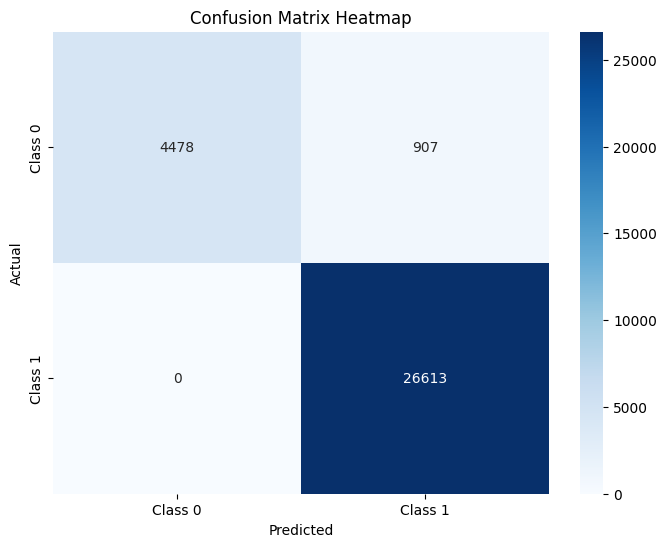

Classification Report for Logistic Regression 3:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      5385
           1       0.97      1.00      0.98     26613

    accuracy                           0.97     31998
   macro avg       0.98      0.92      0.95     31998
weighted avg       0.97      0.97      0.97     31998



In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)  # Train the classifier on the strat_train_set
    y_pred = clf.predict(X_test)  # Predict on the test set
    
    print(f"Evaluating {name}...")
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy:.2f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()
    
    # Classification Report
    cr = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:\n{cr}")

    # dumping the created model
    joblib.dump(clf, 'Review_classifier_LG.pkl')

## Best Performing Model:

Training Logistic Regression 3...

Evaluating Logistic Regression 3..

Accuracy for Logistic Regression 3: 0.97


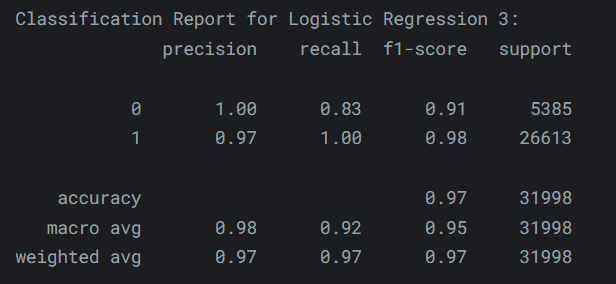

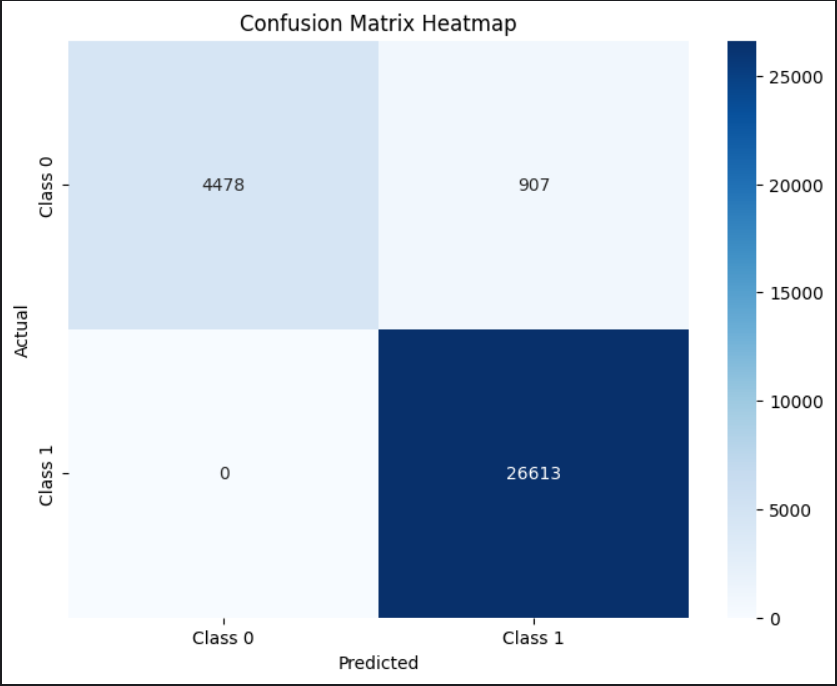

## Grid search CV for finding out best hyperparams

In [64]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV, cross_val_score
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Define the classifiers and their respective parameter grids
# param_grids = {
#     "Logistic Regression": {
#         "classifier": LogisticRegression(max_iter=1000),
#         "params": {
#             "C": [0.0001, 0.001, 0.01, 0.1, 1, 10],
#             "penalty": ["l1", "l2"],
#             "solver": ["liblinear", "saga"]
#         }
#     },
#     "Support Vector Machine": {
#         "classifier": SVC(),
#         "params": {
#             "C": [0.001, 0.01, 0.1, 1, 10],
#             "kernel": ["linear", "poly", "rbf", "sigmoid"]
#         }
#     },
#     "Random Forest": {
#         "classifier": RandomForestClassifier(),
#         "params": {
#             "n_estimators": [30, 40, 50, 100, 200],
#             "max_depth": [None, 10, 20, 30],
#             "min_samples_split": [2, 5, 10],
#             "min_samples_leaf": [1, 2, 4]
#         }
#     },
#     "Gradient Boosting": {
#         "classifier": GradientBoostingClassifier(),
#         "params": {
#             "learning_rate": [0.01, 0.1, 0.2],
#             "n_estimators": [30, 40, 50, 100, 200],
#             "max_depth": [3, 4, 5]
#         }
#     },
#     "K-Nearest Neighbors": {
#         "classifier": KNeighborsClassifier(),
#         "params": {
#             "n_neighbors": [1, 2, 3, 5, 7, 9],
#             "weights": ["uniform", "distance"]
#         }
#     }
# }

# n_folds = 5

# # Perform Grid Search with Cross-Validation
# best_classifiers = {}
# all_cv_results = {}
# for name, clf_dict in param_grids.items():
#     clf = clf_dict["classifier"]
#     param_grid = clf_dict["params"]
#     print(f"Performing Grid Search for {name}...")
#     grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=n_folds, n_jobs=-1, scoring='accuracy', return_train_score=True)
#     grid_search.fit(X_train, y_train)
#     best_classifiers[name] = grid_search.best_estimator_
#     all_cv_results[name] = pd.DataFrame(grid_search.cv_results_)
#     print(f"Best parameters for {name}: {grid_search.best_params_}")
#     print(f"Best cross-validation score for {name}: {grid_search.best_score_:.2f}")
#     print("\n" + "-"*60 + "\n")

# # Display all hyperparameter results
# for name, cv_results in all_cv_results.items():
#     print(f"All hyperparameter results for {name}:")
#     display(cv_results)

## Best Hyperparams 

    "Logistic Regression 1": LogisticRegression(max_iter=1000, C=0.0001, penalty="l2", solver="saga"),
    "Logistic Regression 2": LogisticRegression(max_iter=1000, C=0.0002, penalty="l2", solver="saga"),
    "Logistic Regression 3": LogisticRegression(max_iter=1000, C=0.0003, penalty="l2", solver="saga"),
    "Logistic Regression 4": LogisticRegression(max_iter=1000, C=0.0004, penalty="l2", solver="saga"),
    "Logistic Regression 5": LogisticRegression(max_iter=1000, C=0.0005, penalty="l2", solver="saga"),
    "Support Vector Machine 1": SVC(C=0.001, kernel="poly"),
    "Support Vector Machine 2": SVC(C=0.001, kernel="rbf"),
    "Support Vector Machine 3": SVC(C=0.001, kernel="sigmoid"),
    "Support Vector Machine 1": SVC(C=0.0001, kernel="poly"),
    "Support Vector Machine 2": SVC(C=0.0001, kernel="rbf"),
    "Support Vector Machine 3": SVC(C=0.0001, kernel="sigmoid"),

# Creating Pipelines for deployment purpose

## Numerical features scaling pipeline

In [65]:
from sklearn.pipeline import Pipeline as PL
from sklearn.preprocessing import StandardScaler

scaling_pipeline = PL([ ('scalar', StandardScaler()) ])

scaling_pipeline.fit(scaling_pipeline_fitting_data)

input_data = {
    'reviewLength': 653, 
    'helpfulRatio': 0.0, 
    'wordCount': 117,
    'avgWordLength': 4.538462
}

# Convert the input dictionary to a Pandas DataFrame
input_df = pd.DataFrame([input_data])

ans = scaling_pipeline.transform(input_df)

print(ans)

[[ 0.73559508 -0.66735565  0.68136854  0.51034363]]


## Text Vectorization Pipeline

In [66]:
from sklearn.pipeline import Pipeline as PL
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization_pipeline = PL([ ('tfidf_vectorizer', TfidfVectorizer(max_features=2000, max_df=0.8)) ])

vectorization_pipeline.fit(vectorization_pipeline_fitting_data)

input_data = {
    'cleaned_reviewText': "product amazing cannot believe well work use week impress highly recommend"
}


input_df = pd.DataFrame([input_data])

ans = vectorization_pipeline.transform(input_df)

dense_matrix = ans.toarray()

df_dense = pd.DataFrame(dense_matrix)

print(df_dense)

   0     1     2     3     4     5     6     7     8     9     ...  1990  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   1991  1992  1993  1994  1995  1996  1997  1998  1999  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[1 rows x 2000 columns]


## Dumping Pipelines

In [67]:
import pickle

with open('scaling_pipeline.pkl', 'wb') as file:
    pickle.dump(scaling_pipeline, file)

print("Scaling pipeline has been dumped successfully.")

with open('vectorization_pipeline.pkl', 'wb') as file:
    pickle.dump(vectorization_pipeline, file)

print("Vectorization Pipeline has been dumped successfully.")

Scaling pipeline has been dumped successfully.
Vectorization Pipeline has been dumped successfully.


## Freezing requirements.txt for deployment purpose

In [68]:
!pip freeze > requirements.txt